In [3]:
import pandas as pd
import numpy as np
import pickle 


from sklearn.metrics import mean_squared_error
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
%load_ext autoreload
%autoreload 2
from main.fairness.metrics import unfairness
from main.fairness.wasserstein import MultiWasserStein

In [128]:
with open('data/results/application_data_dict.pkl', 'rb') as con_:
    data_dict = pickle.load(con_)

with open('data/results/application_visualisation.pkl', 'rb') as con_:
    estimation_results = pickle.load(con_)

with open('data/results/all_results_application.pkl', 'rb') as con_:
    full_estimation = pickle.load(con_)

In [16]:
booster_model = lgb.Booster(model_file='data/models/best_iteration_model.txt')
raw_predictions = booster_model.predict(data_dict['X_test'])

# Arrow plot

/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/3007351879.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(fair_SEX_x,
/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/3007351879.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(fair_Black_x,


(0.0, 0.45)

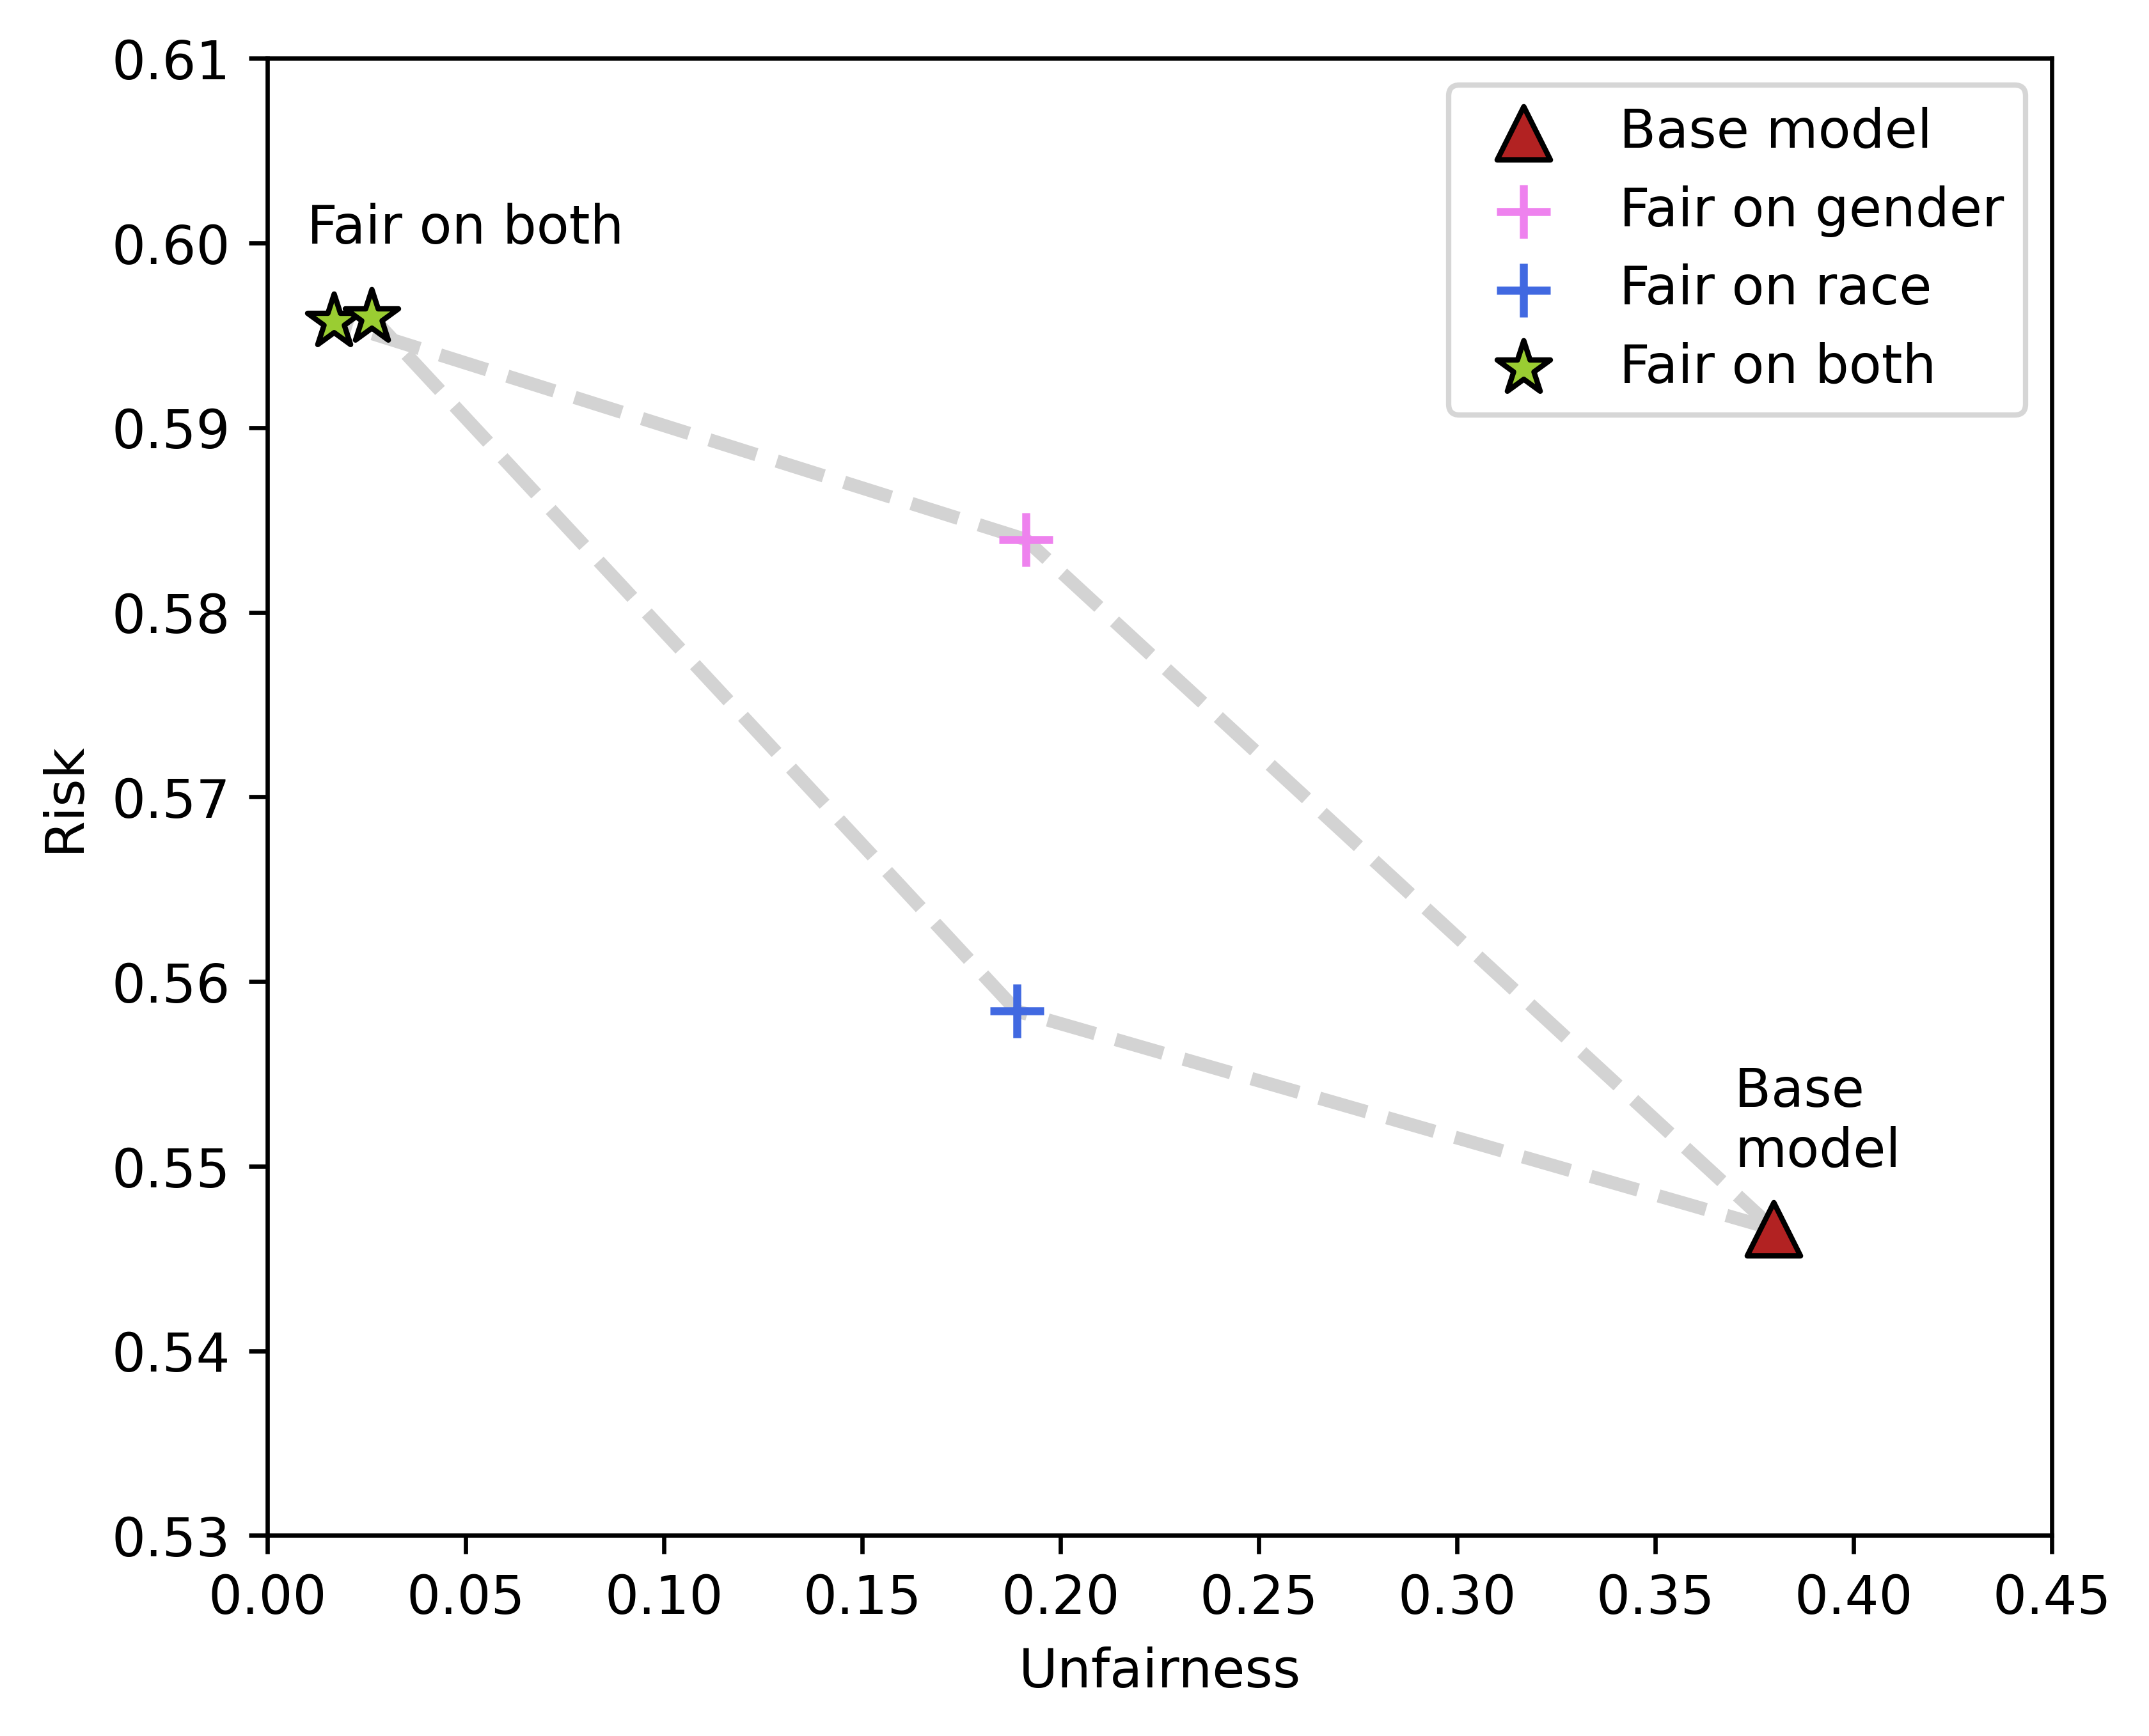

In [122]:
all_cols = {
    0: u'firebrick',
    1: u'violet',
    2: u'royalblue',
    3: u'yellowgreen'
}


fig, ax = plt.subplots(figsize=(6,5), 
                       dpi=600)

base_mod_x = estimation_results['baseline']['level_0']['unfairness']
base_mod_y = estimation_results['baseline']['level_0']['mse']

fair_SEX_x = estimation_results[('SEX_2','RAC1P_black')]['level_0']['unfairness']
fair_SEX_y = estimation_results[('SEX_2','RAC1P_black')]['level_0']['mse']

fair_Black_x = estimation_results[('RAC1P_black','SEX_2')]['level_0']['unfairness']
fair_Black_y = estimation_results[('RAC1P_black', 'SEX_2')]['level_0']['mse']

fair_both_sex_x = estimation_results[('SEX_2','RAC1P_black')]['level_1']['unfairness']
fair_both_sex_y = estimation_results[('SEX_2','RAC1P_black')]['level_1']['mse']

fair_both_black_x = estimation_results[('RAC1P_black','SEX_2')]['level_1']['unfairness']
fair_both_black_y = estimation_results[('RAC1P_black','SEX_2')]['level_1']['mse']

size_intermediate=100
size_base = 100
size_good = 110
line_width=2.5



ax.scatter(base_mod_x,
           base_mod_y, 
           label='Base model', 
           c = all_cols[0], 
           marker="^",
           s=size_base, 
           edgecolors='black',
           zorder=2)

ax.scatter(fair_SEX_x,
           fair_SEX_y, 
           label='Fair on gender', 
           c = all_cols[1], 
           marker='+', 
           s=size_intermediate,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_Black_x,
           fair_Black_y, 
           label='Fair on race', 
           c = all_cols[2],
           marker='+', 
           s=size_intermediate,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_both_sex_x,
           fair_both_sex_y, 
           label='Fair on both', 
           c = all_cols[3], 
           marker='*', 
           s=size_good,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_both_black_x,
           fair_both_black_y, 
           c = all_cols[3],
           marker='*',
           s=size_good,
           edgecolors='black',
           zorder=2)

ax.set_axisbelow(True)


ax.plot([base_mod_x, fair_SEX_x],
        [base_mod_y, fair_SEX_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.plot([fair_SEX_x, fair_both_sex_x],
        [fair_SEX_y, fair_both_sex_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )


ax.plot([base_mod_x, fair_Black_x],
        [base_mod_y, fair_Black_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.plot([fair_Black_x, fair_both_black_x],
        [fair_Black_y, fair_both_black_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.annotate('Base \nmodel', 
            (0.37, 0.55))

ax.annotate('Fair on both', 
            (0.01, 0.60))

ax.set_ylabel('Risk')
ax.set_xlabel('Unfairness')


plt.legend()

plt.ylim(0.53, 0.61)
plt.xlim(0, 0.45)

# Individual Efffect

In [160]:
predictions_sex = full_estimation[('SEX_2', 'RAC1P_black')]['level_0']['prediction']
predictions_race = full_estimation[('RAC1P_black', 'SEX_2')]['level_0']['prediction']
predictions_corrected = full_estimation[('SEX_2', 'RAC1P_black')]['level_1']['prediction']

black_idx = np.where(data_dict['X_test'].RAC1P_black == 1)[0]
nonblack_idx = np.where(data_dict['X_test'].RAC1P_black == 0)[0]
men_idx = np.where(data_dict['X_test'].SEX_2 == 0)[0]
women_idx = np.where(data_dict['X_test'].SEX_2 == 1)[0]

black_women = ([value for value in black_idx if value in women_idx])
nonblack_woman = ([value for value in nonblack_idx if value in women_idx])

In [161]:
init_black = raw_predictions[black_women]
init_nonblack = raw_predictions[nonblack_woman]

correct_sex_black = predictions_sex[black_women]
correct_sex_nonblack = predictions_sex[nonblack_woman]

correct_race_black = predictions_race[black_women]
correct_race_nonblack = predictions_race[nonblack_woman]

correct_both_black = predictions_corrected[black_women]
correct_both_nonblack = predictions_corrected[nonblack_woman]

In [173]:
all_values = [init_black, 
              init_nonblack, 
              correct_sex_black, 
              correct_sex_nonblack, 
              correct_race_black, 
              correct_race_nonblack, 
              correct_both_black, 
              correct_both_nonblack]

all_names = ['init_black', 
              'init_nonblack', 
              'correct_sex_black', 
              'correct_sex_nonblack', 
              'correct_race_black', 
              'correct_race_nonblack', 
              'correct_both_black', 
              'correct_both_nonblack']

dict_all = dict(zip(all_names, all_values))

In [487]:
init_black_median = np.median(np.exp(init_black))
init_nonblack_median = np.median(np.exp(init_nonblack))

sex_black_median = np.median(np.exp(correct_sex_black))
sex_nonblack_median = np.median(np.exp(correct_sex_nonblack))

race_black_median = np.median(np.exp(correct_race_black))
race_nonblack_median = np.median(np.exp(correct_race_nonblack))

In [488]:
diff_black_sex = sex_black_median - init_black_median
diff_nonblack_sex = sex_nonblack_median - init_nonblack_median

diff_black_race = race_black_median - init_black_median
diff_nonblack_race = race_nonblack_median - init_nonblack_median

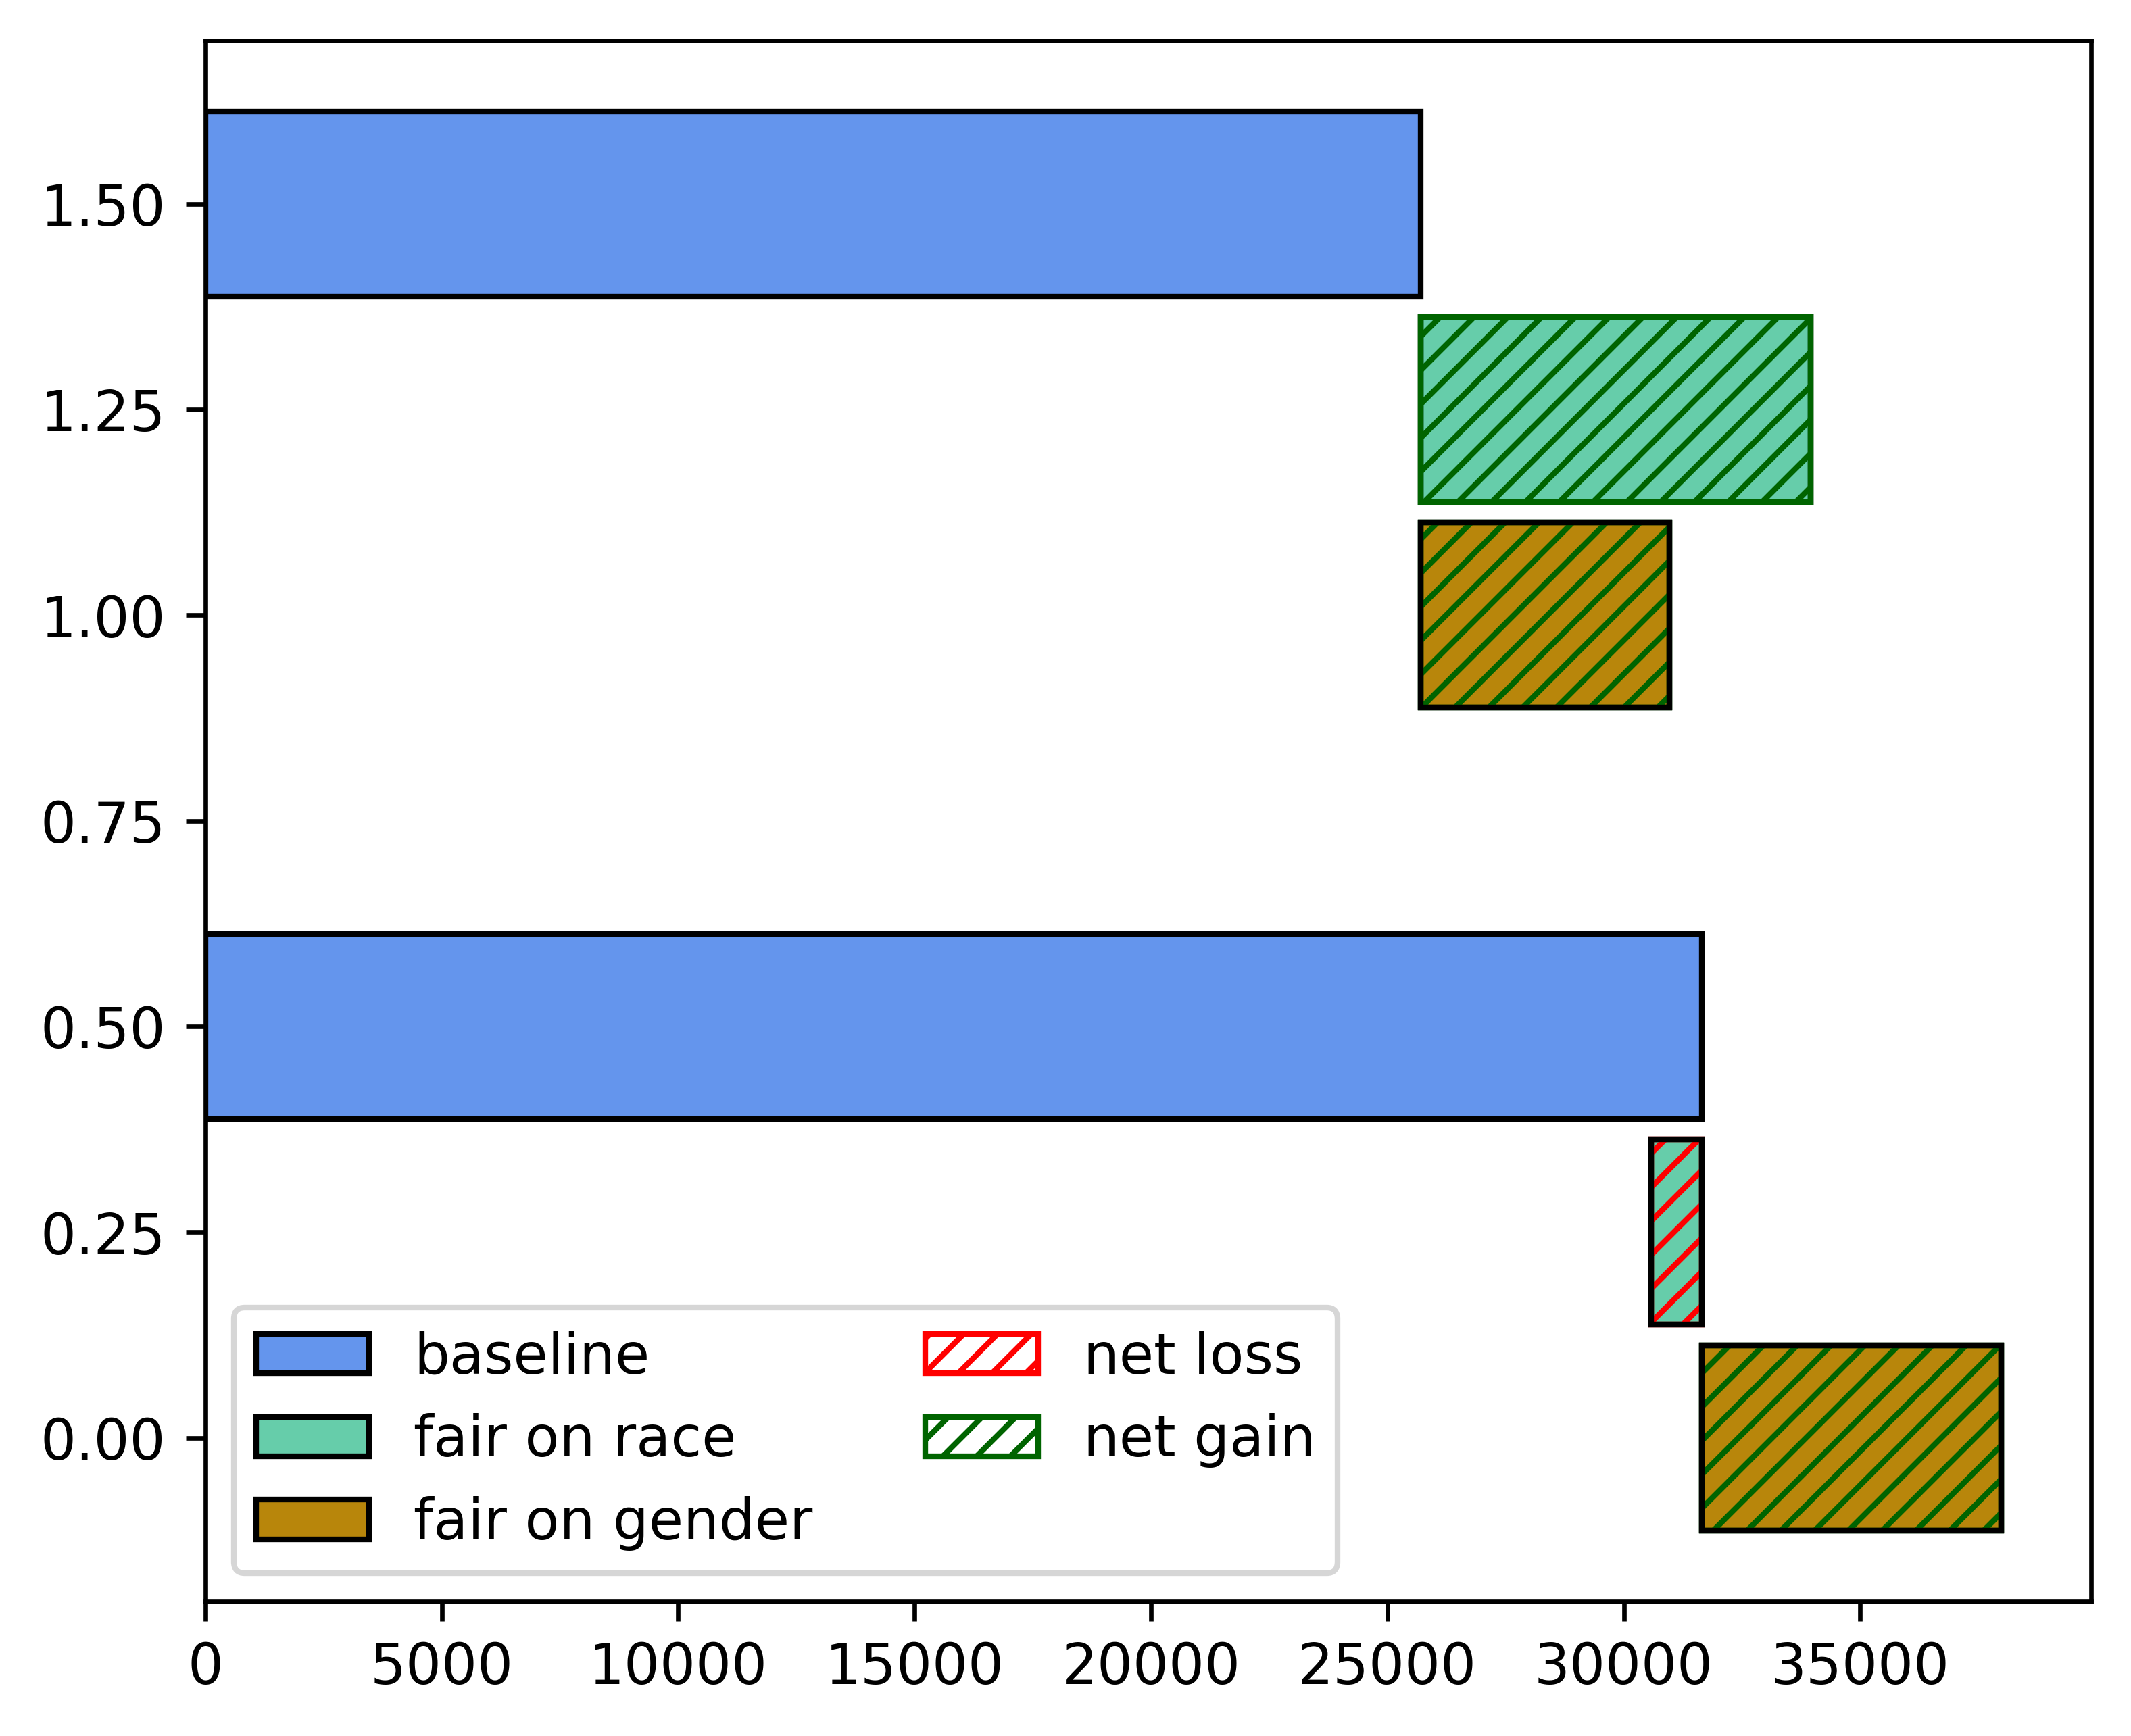

In [548]:
fig, ax = plt.subplots(figsize=(6,5), 
                       dpi=600)

race_ = ("Sensitive", "Other")

overall_values = {
    'Fairness gender': (diff_black_sex, diff_nonblack_sex),
    'Fairness race': (diff_black_race, diff_nonblack_race),
    'Baseline': (init_black_median, init_nonblack_median),
}

x = np.flip(np.arange(2))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

color_baseline = u'cornflowerblue'
color_race = u'mediumaquamarine'
color_sex = u'darkgoldenrod'
color_loss = u'red'
color_gain = u'darkgreen'

# Two baselines
ax.barh(0.5,
        init_nonblack_median,
        width-0.025,
        label='baseline', 
        left=0, 
        color=color_baseline,
        edgecolor='black')

ax.barh(1.5,
        init_black_median,
        width-0.025,
        left=0, 
        color=color_baseline,
        edgecolor='black')

# Race
ax.barh(0.25,
        diff_nonblack_race,
        width-0.025,
        label='fair on race', 
        left=init_nonblack_median, 
        color=color_race,
        edgecolor='black',
        zorder=0)

ax.barh(1.25,
        diff_black_race,
        width-0.025,
        left=init_black_median, 
        color=color_race,
        edgecolor='black',
        zorder=0)

# Sex
ax.barh(0,
        diff_nonblack_sex,
        width-0.025,
        label='fair on gender', 
        left=init_nonblack_median, 
        edgecolor='black', 
        color=color_sex, 
        zorder=0)

ax.barh(1,
        diff_black_sex,
        width-0.025,
        left=init_black_median, 
        edgecolor='black', 
        color=color_sex, 
        zorder=0)

# Add hatches
ax.barh(0.25,
        diff_nonblack_race,
        width-0.025,
        label='net loss', 
        left=init_nonblack_median, 
        color='none',
        edgecolor=color_loss, 
        hatch='////',
        zorder=1)

ax.barh(0.0,
        diff_nonblack_sex,
        width-0.025,
        label='net gain', 
        left=init_nonblack_median, 
        color='none',
        edgecolor=color_gain, 
        hatch='////',
        zorder=1)

ax.barh(1.25,
        diff_black_race,
        width-0.025,
        left=init_black_median, 
        color='none',
        edgecolor=color_gain, 
        hatch='////',
        zorder=1)

ax.barh(1,
        diff_black_sex,
        width-0.025,
        left=init_black_median, 
        color='none',
        edgecolor=color_gain, 
        hatch='////',
        zorder=1)

# Re-add black edges
ax.barh(0.25,
        diff_nonblack_race,
        width-0.025,
        left=init_nonblack_median, 
        color='none',
        edgecolor='black', 
        zorder=2)

ax.barh(0.0,
        diff_nonblack_sex,
        width-0.025,
        left=init_nonblack_median, 
        color='none',
        edgecolor='black', 
        zorder=2)

ax.barh(1.25,
        diff_black_race,
        width-0.025,
        left=init_black_median, 
        color='none',
        edgecolor=color_gain, 
        zorder=2)

ax.barh(1,
        diff_black_sex,
        width-0.025,
        left=init_black_median, 
        color='none',
        edgecolor='black', 
        zorder=2)




plt.legend(ncol=2)

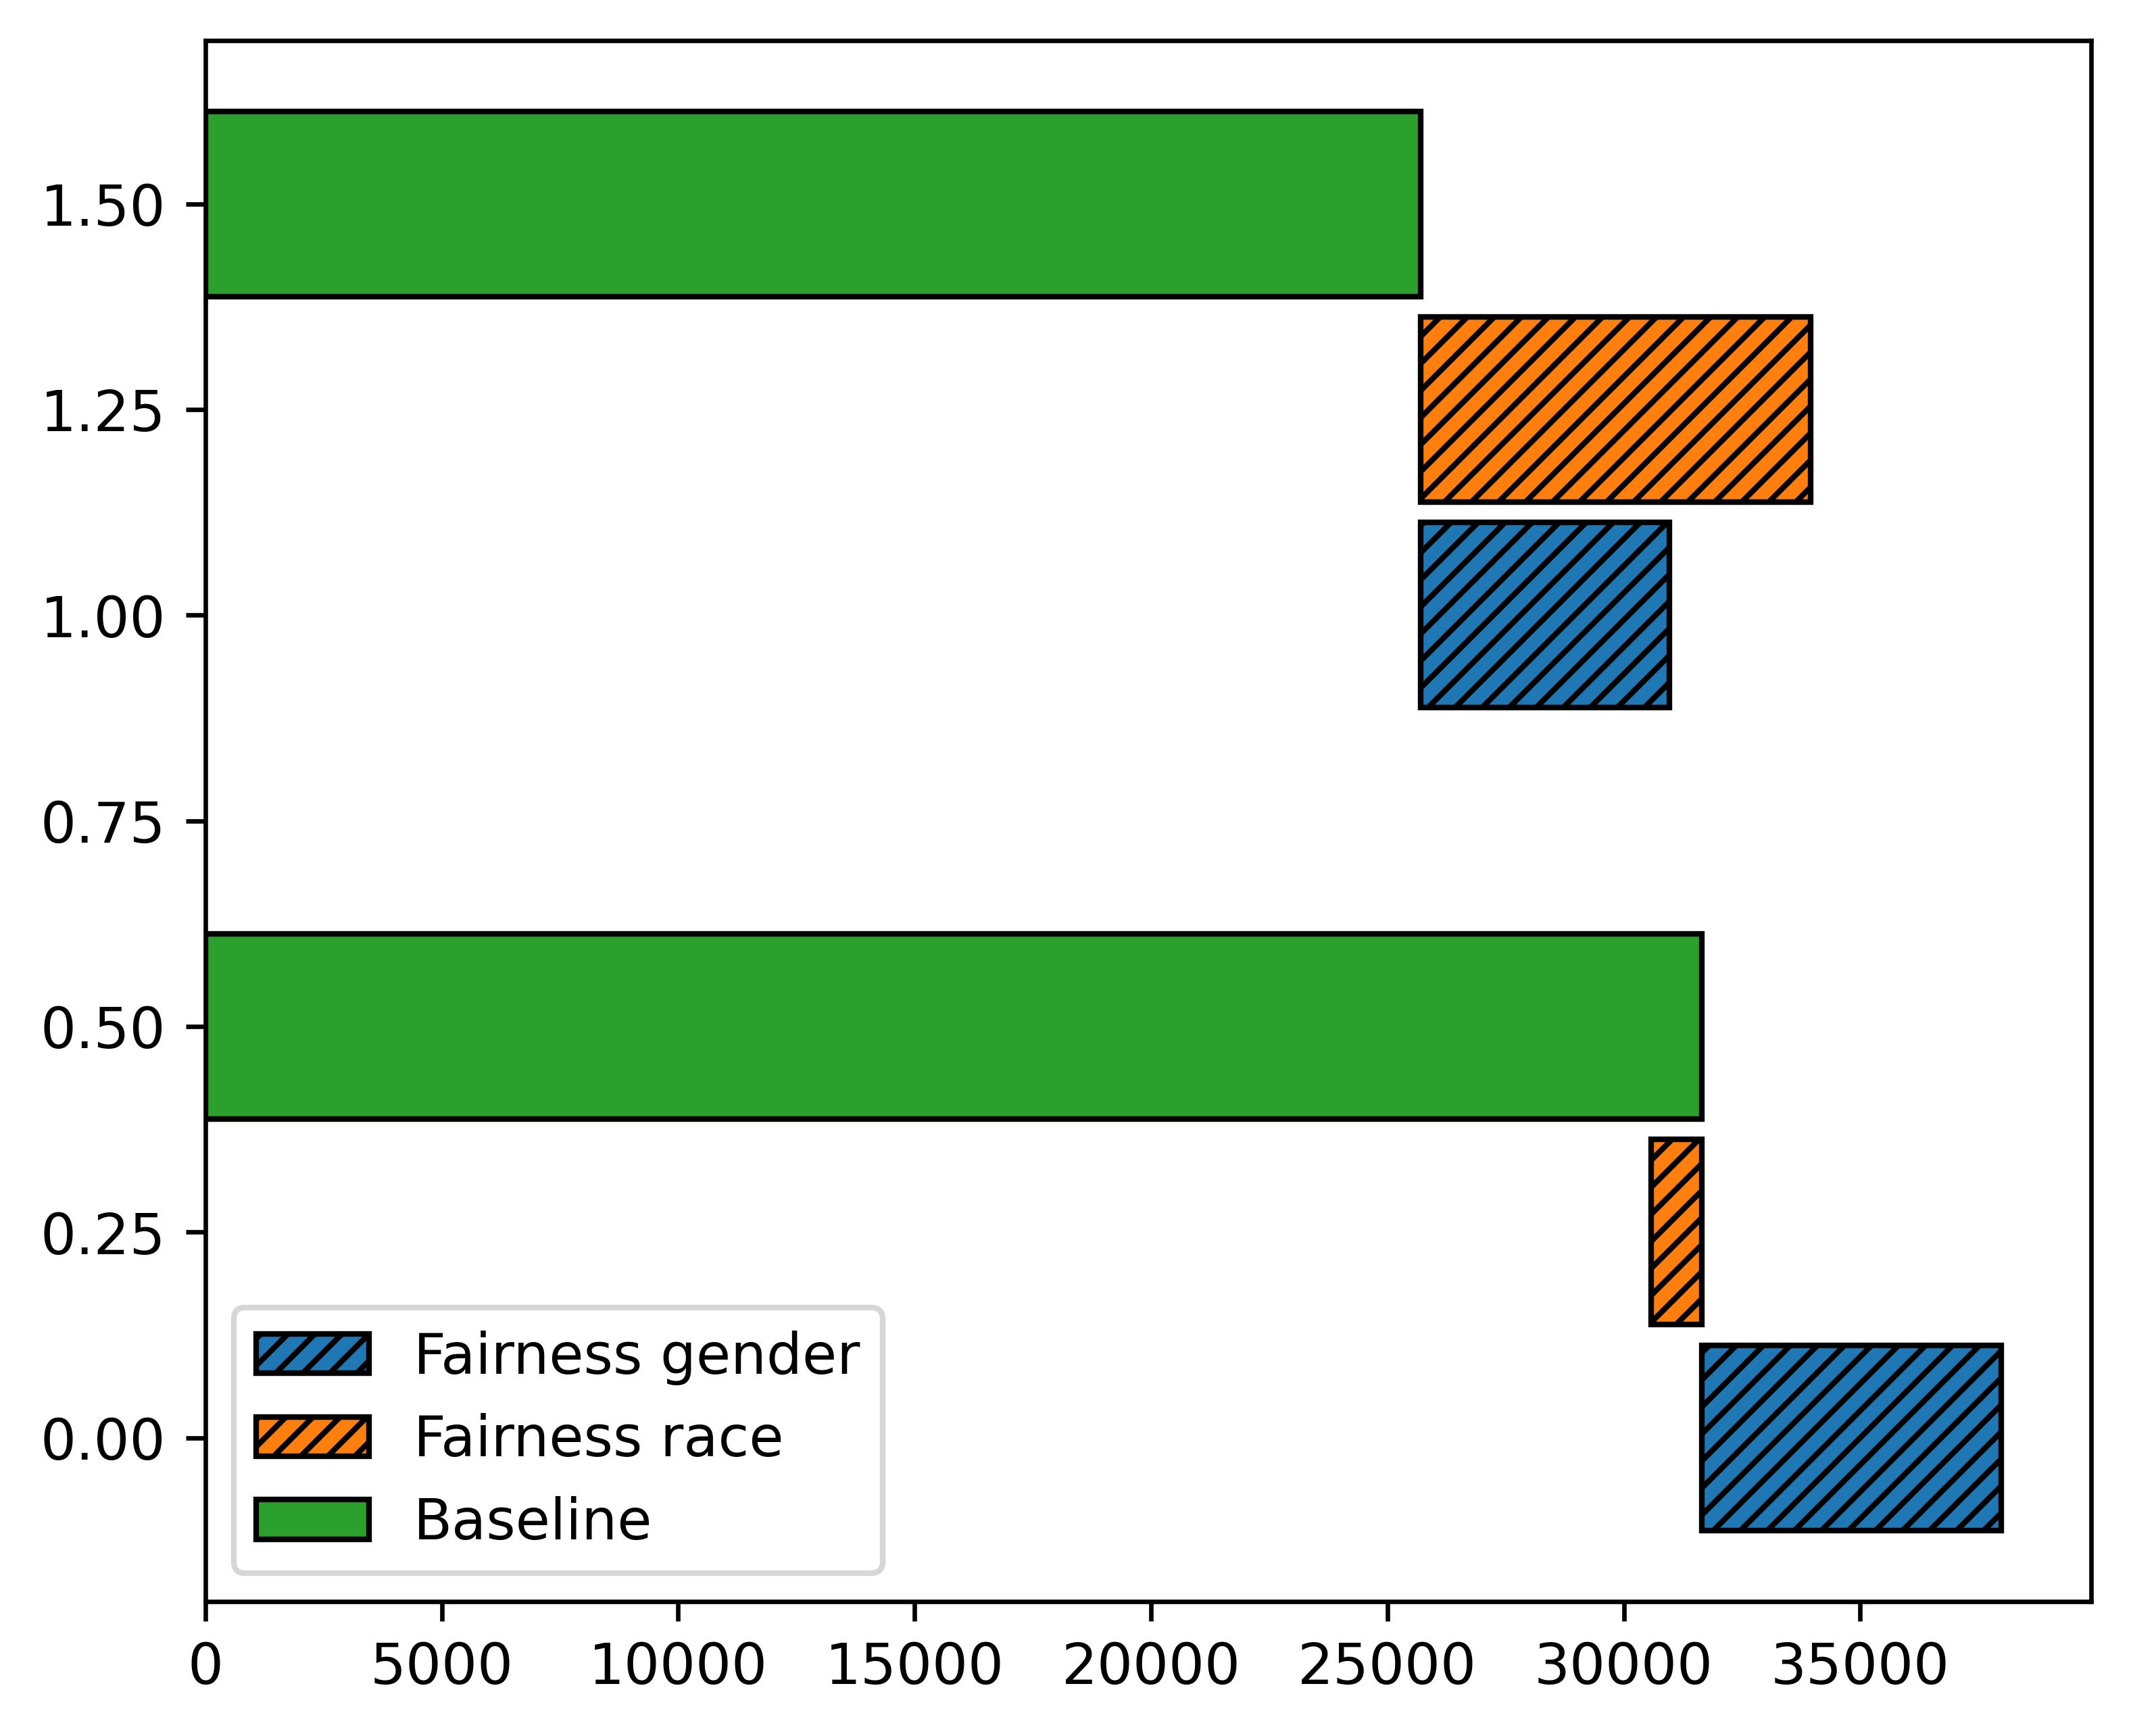

In [523]:
fig, ax = plt.subplots(figsize=(6,5), 
                       dpi=600)



race_ = ("Sensitive", "Other")

overall_values = {
    'Fairness gender': (diff_black_sex, diff_nonblack_sex),
    'Fairness race': (diff_black_race, diff_nonblack_race),
    'Baseline': (init_black_median, init_nonblack_median),
}

x = np.flip(np.arange(2))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0


for attribute, measurement in overall_values.items():
    if attribute == 'Baseline':
        left_offset = [0,0]
    else:
        left_offset = np.array([init_black_median,init_nonblack_median])
    
    offset = width * multiplier

    if attribute == 'Baseline':
        rects = ax.barh(x + offset,
                        measurement,
                        width-0.025,
                        label=attribute, 
                        left=left_offset, 
                        edgecolor='black')
        multiplier += 1
    else:
        rects = ax.barh(x + offset,
                        measurement,
                        width-0.025,
                        label=attribute, 
                        left=left_offset, 
                        edgecolor='black', 
                        hatch='/////')
        multiplier += 1

plt.legend()


# Constant Female Salary

In [176]:
def get_epsilon_grid_values(pred_fair, pred_unfair):
    epsilon_space = np.flip(np.linspace(0,1,100))

    all_epsilon_pred = []
    for epsilon_ in epsilon_space:
        new_pred = epsilon_*pred_unfair + (1-epsilon_)*pred_fair
        all_epsilon_pred.append(new_pred)

    return all_epsilon_pred


In [374]:
eps_values_nonblack = get_epsilon_grid_values(correct_race_nonblack, init_nonblack)
eps_values_sex_nonblack = get_epsilon_grid_values(correct_sex_nonblack, init_nonblack)

In [375]:
# Calculate slope
lin_space = np.linspace(0,1,100)
line_nonblack_black = np.mean(eps_values_nonblack, axis=1)
line_nonblack_sex = np.mean(eps_values_sex_nonblack, axis=1)

slope_nonblack_black = (line_nonblack_black[1] - line_nonblack_black[-2])/(lin_space[1]-lin_space[-2])
slope_nonblack_sex = (line_nonblack_sex[1] - line_nonblack_sex[-2])/(lin_space[1]-lin_space[-2])

In [432]:
fairness_preds = []
slope_ = 0.17162161017621305


for val_ in [0.2,0.4,0.6,0.8,1]:
    model_wasserstein = MultiWasserStein(estimator=booster_model)

    model_wasserstein.fit(X_calib=data_dict['X_calib'], 
                        sensitive_name='RAC1P_black', 
                        epsilon=val_)

    response=model_wasserstein.transform(X=data_dict['X_test'], 
                                        sensitive_name='RAC1P_black', 
                                        epsilon=(1-val_))

    model_wasserstein.fair['level_0'] = response

    model_wasserstein.level+=1

    model_wasserstein.fit(X_calib=data_dict['X_calib'], 
                          sensitive_name='SEX_2')

    response_2_tmp =model_wasserstein.transform(X=data_dict['X_test'], 
                                            sensitive_name='SEX_2', 
                                            epsilon=(1-(slope_*val_)))    
    
    fairness_preds.append(response_2_tmp)



saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods


In [433]:
slope_ = 0.17162161017621305
counter=0

for val_ in np.linspace(slope_, 1, 5):
    model_wasserstein = MultiWasserStein(estimator=booster_model)

    model_wasserstein.fit(X_calib=data_dict['X_calib'], 
                        sensitive_name='RAC1P_black', 
                        epsilon=0)

    response=model_wasserstein.transform(X=data_dict['X_test'], 
                                        sensitive_name='RAC1P_black', 
                                        epsilon=0)

    model_wasserstein.fair['level_0'] = response

    model_wasserstein.level+=1

    model_wasserstein.fit(X_calib=data_dict['X_calib'], 
                          sensitive_name='SEX_2')

    response_2_tmp =model_wasserstein.transform(X=data_dict['X_test'], 
                                            sensitive_name='SEX_2', 
                                            epsilon=(1-(val_)))    
    
    counter += 1

    if counter > 1:
        fairness_preds.append(response_2_tmp)

saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods
saving mods


In [434]:
def get_metrics_second(idx_black, idx_nonblack, 
                       idx_women, idx_nonwomen, 
                       preds, y_test):
    unfairness_tmp = 0
    unfairness_tmp += unfairness(preds[idx_black], preds[idx_nonblack])
    unfairness_tmp += unfairness(preds[idx_women], preds[idx_nonwomen])
    
    mse_ = mean_squared_error(y_test, preds)
    
    return (unfairness_tmp, mse_)


In [435]:
all_tuples = []

for pred_ in fairness_preds:
    all_tuples.append(get_metrics_second(black_idx, nonblack_idx, 
                                         women_idx, men_idx, 
                                         pred_, data_dict['y_test']))

/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/1242387303.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(fair_SEX_x,
/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/1242387303.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(fair_Black_x,
/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/1242387303.py:93: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(tup_[0],
/var/folders/jy/l1h7n_nx6sl3h96lm_0n3ppc0000gn/T/ipykernel_49432/1242387303.py:83: UserWarning: Yo

(0.0, 0.45)

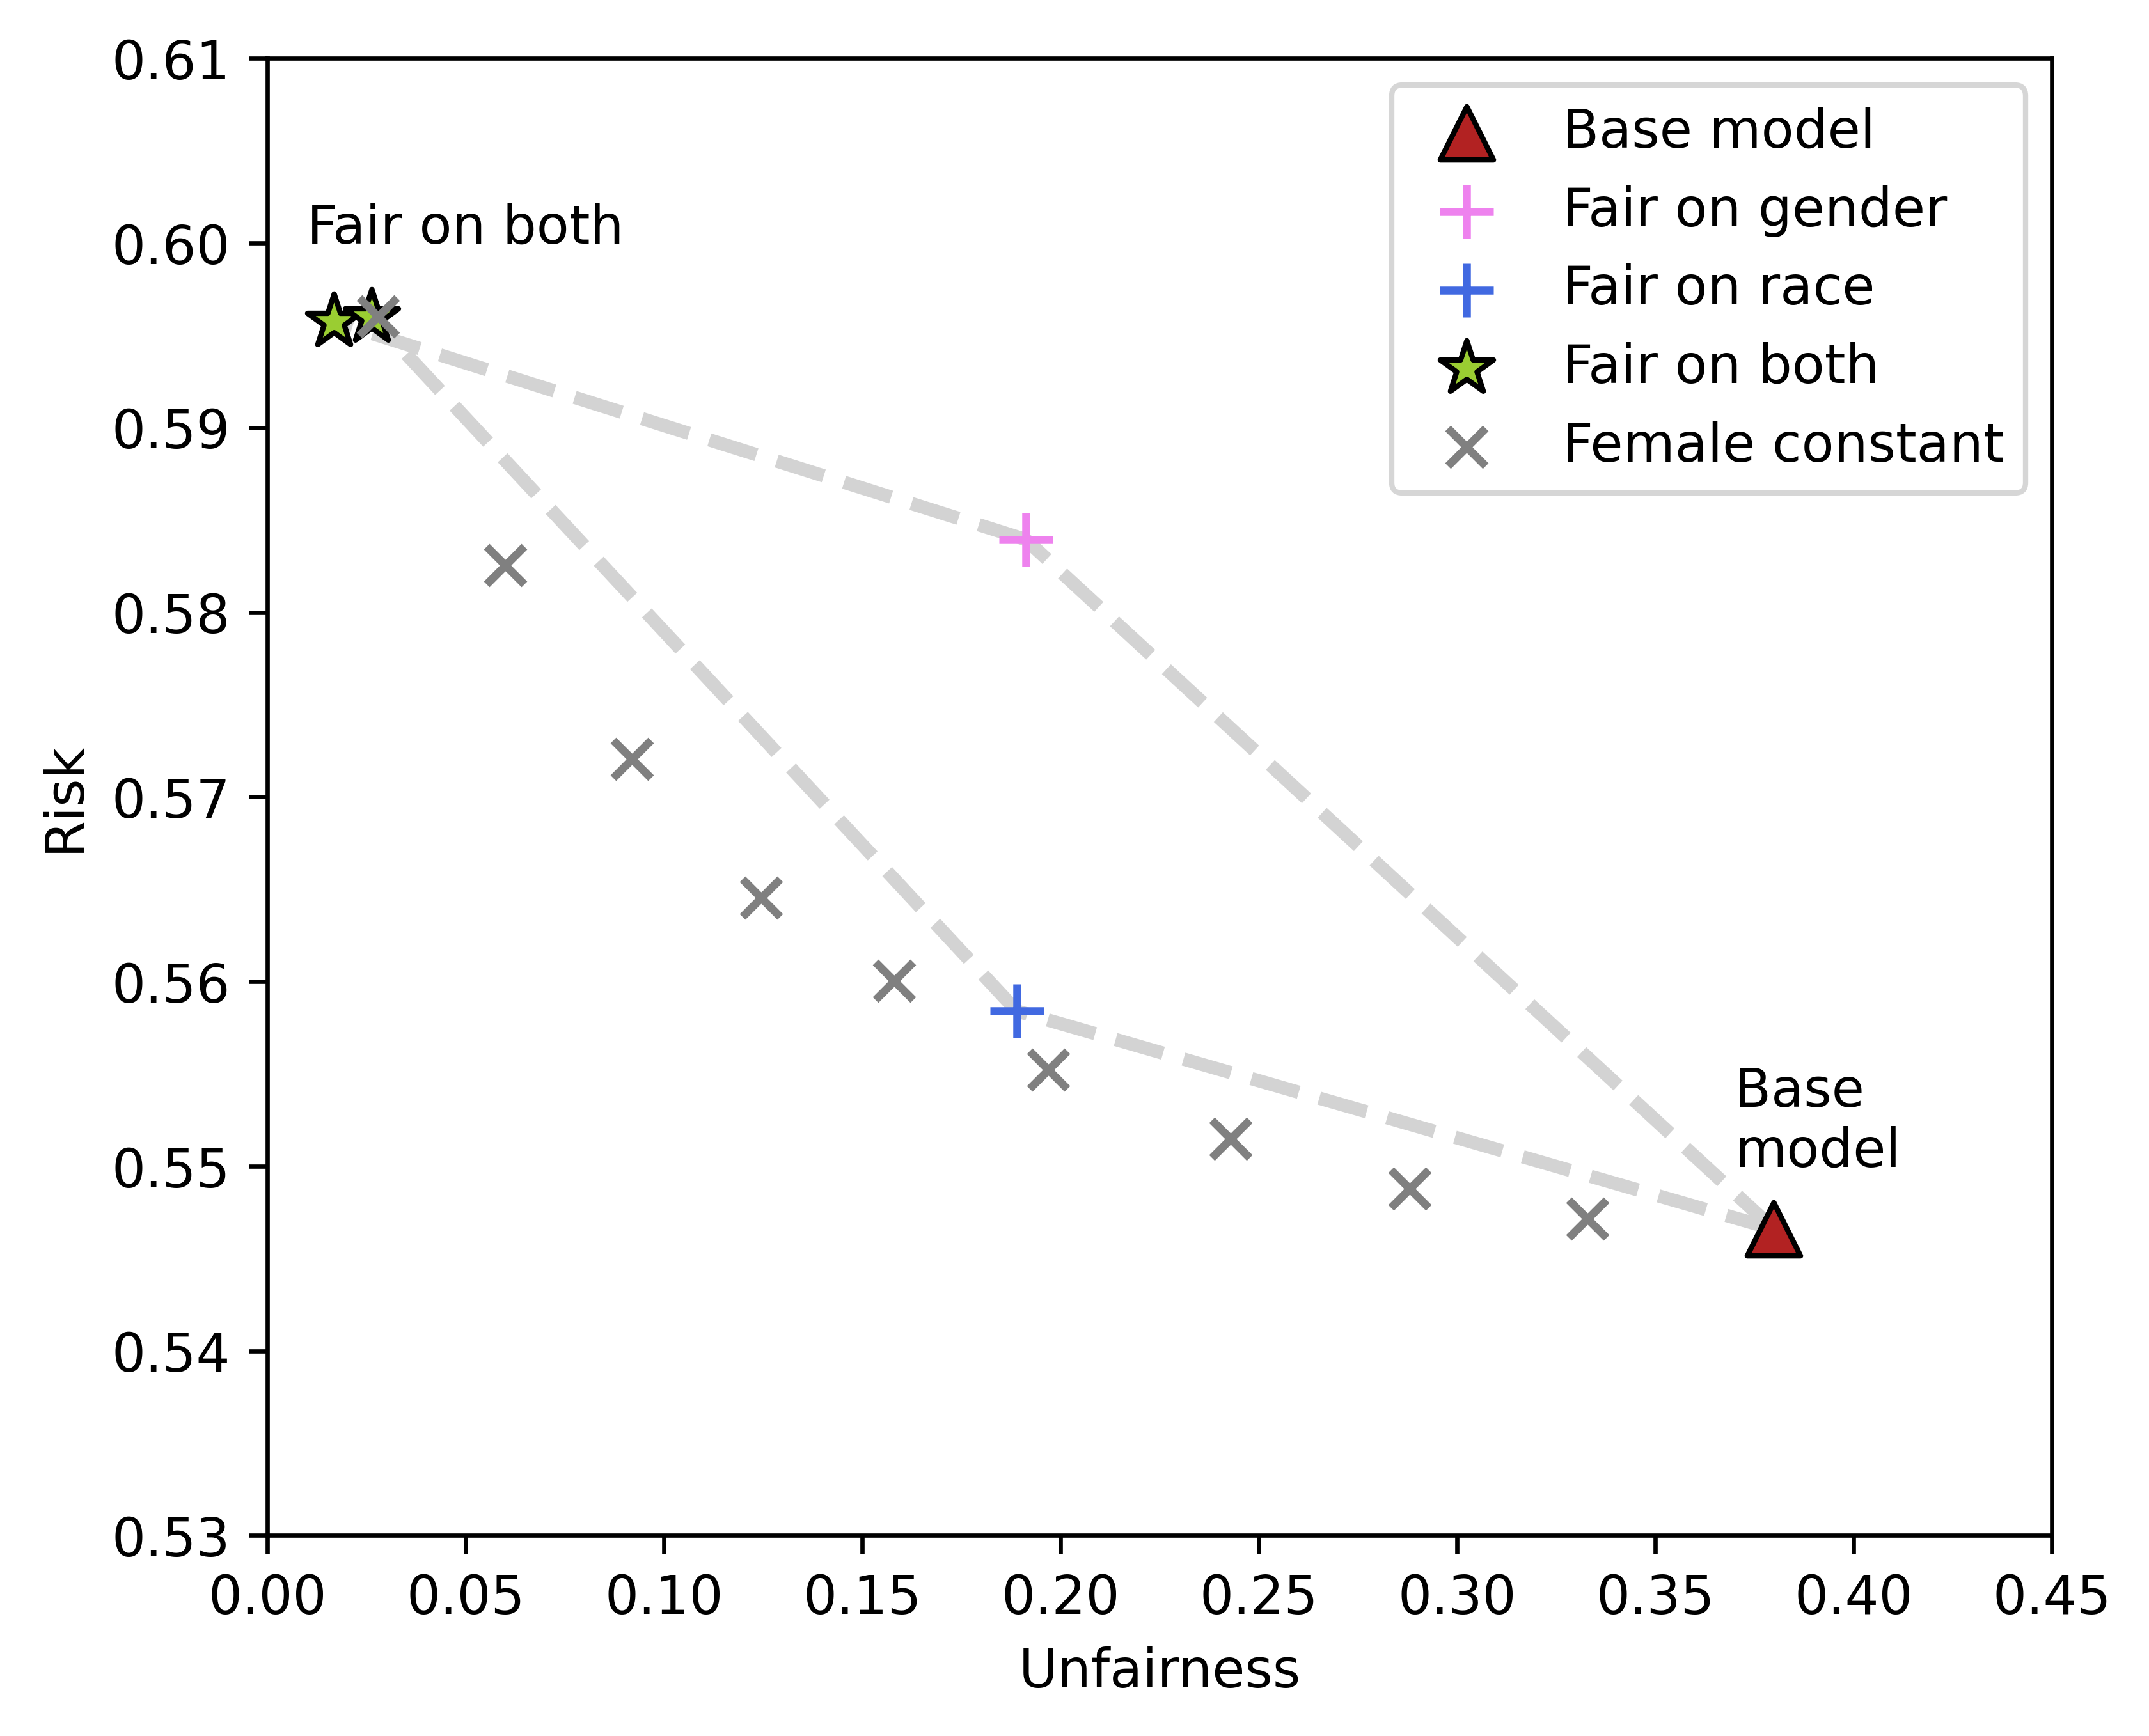

In [440]:
all_cols = {
    0: u'firebrick',
    1: u'violet',
    2: u'royalblue',
    3: u'yellowgreen'
}


fig, ax = plt.subplots(figsize=(6,5), 
                       dpi=600)

base_mod_x = estimation_results['baseline']['level_0']['unfairness']
base_mod_y = estimation_results['baseline']['level_0']['mse']

fair_SEX_x = estimation_results[('SEX_2','RAC1P_black')]['level_0']['unfairness']
fair_SEX_y = estimation_results[('SEX_2','RAC1P_black')]['level_0']['mse']

fair_Black_x = estimation_results[('RAC1P_black','SEX_2')]['level_0']['unfairness']
fair_Black_y = estimation_results[('RAC1P_black', 'SEX_2')]['level_0']['mse']

fair_both_sex_x = estimation_results[('SEX_2','RAC1P_black')]['level_1']['unfairness']
fair_both_sex_y = estimation_results[('SEX_2','RAC1P_black')]['level_1']['mse']

fair_both_black_x = estimation_results[('RAC1P_black','SEX_2')]['level_1']['unfairness']
fair_both_black_y = estimation_results[('RAC1P_black','SEX_2')]['level_1']['mse']

size_intermediate=100
size_base = 100
size_good = 110
size_x = 50
line_width=2.5



ax.scatter(base_mod_x,
           base_mod_y, 
           label='Base model', 
           c = all_cols[0], 
           marker="^",
           s=size_base, 
           edgecolors='black',
           zorder=2)

ax.scatter(fair_SEX_x,
           fair_SEX_y, 
           label='Fair on gender', 
           c = all_cols[1], 
           marker='+', 
           s=size_intermediate,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_Black_x,
           fair_Black_y, 
           label='Fair on race', 
           c = all_cols[2],
           marker='+', 
           s=size_intermediate,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_both_sex_x,
           fair_both_sex_y, 
           label='Fair on both', 
           c = all_cols[3], 
           marker='*', 
           s=size_good,
           edgecolors='black',
           zorder=2)

ax.scatter(fair_both_black_x,
           fair_both_black_y, 
           c = all_cols[3],
           marker='*',
           s=size_good,
           edgecolors='black',
           zorder=2)

tup_counter = 0
for tup_ in all_tuples:
    
    if tup_counter == len(all_tuples)-1:
        ax.scatter(tup_[0],
                tup_[1], 
                c = 'grey',
                marker='x',
                s=size_x,
                edgecolors='black',
                zorder=2, 
                label='Female constant')
        
    else:
        ax.scatter(tup_[0],
                tup_[1], 
                c = 'grey',
                marker='x',
                s=size_x,
                edgecolors='black',
                zorder=2)       
    
    tup_counter += 1


ax.set_axisbelow(True)


ax.plot([base_mod_x, fair_SEX_x],
        [base_mod_y, fair_SEX_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.plot([fair_SEX_x, fair_both_sex_x],
        [fair_SEX_y, fair_both_sex_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )


ax.plot([base_mod_x, fair_Black_x],
        [base_mod_y, fair_Black_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.plot([fair_Black_x, fair_both_black_x],
        [fair_Black_y, fair_both_black_y], 
        linestyle='dashed', 
        color='lightgrey', 
        linewidth=line_width,
        zorder=1
        )

ax.annotate('Base \nmodel', 
            (0.37, 0.55))

ax.annotate('Fair on both', 
            (0.01, 0.60))

ax.set_ylabel('Risk')
ax.set_xlabel('Unfairness')


plt.legend()

plt.ylim(0.53, 0.61)
plt.xlim(0, 0.45)